In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

In [ ]:
with open('the_movies_dataset.zip', 'wb') as f:
    f.write(response.content)

In [ ]:
# streaming التدفق
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [ ]:
# كود لفك ضغط الملف
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

In [ ]:
FILE_PATH = './the_movies_dataset'

In [ ]:
import os
os.listdir(FILE_PATH)

['keywords.csv',
 'ratings_small.csv',
 'ratings.csv',
 'credits.csv',
 'links_small.csv',
 'links.csv',
 'movies_metadata.csv']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Удалим из датафрейма избыточные данные (Remove unnecessary data from the dataframe)
df = df.drop(['imdb_id'], axis=1)  # حذف عمود imdb_id
df = df.drop(['adult'], axis=1)     # حذف عمود adult
df = df.drop(['belongs_to_collection'], axis=1)  # حذف عمود belongs_to_collection
df = df.drop(['homepage'], axis=1)  # حذف عمود homepage
df = df.drop(['video'], axis=1)     # حذف عمود video
df = df.drop(['poster_path'], axis=1)  # حذف عمود poster_path
df = df.drop(['production_companies'], axis=1)  # حذف عمود production_companies

In [ ]:
df.info()

In [ ]:
df[df['revenue'] == 0].shape

In [ ]:
df['revenue'] = df["revenue"].replace(0, np.nan)

In [ ]:
df[df['revenue'] == 0].shape

In [ ]:
# التحقق من أنواع البيانات في الأعمده المختلفه
print(df.budget.dtypes)
print(df.revenue.dtypes)

In [ ]:
# تنظيف عمود الميزانيه
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

In [ ]:
df[['title', 'release_date']].head()

In [ ]:
#################################################################

In [ ]:
import pandas as pd
movies_df = pd.read_csv("movies_metadata.csv")
print(movies_df)

FileNotFoundError: [Errno 2] No such file or directory: 'movies_metadata.csv'

In [ ]:
import numpy as np

# إنشاء مصفوفة أربع أبعاد
array_4d = np.random.rand(2, 3, 4, 5)  # مصفوفة عشوائية بأبعاد 2x3x4x5
print(array_4d)

# طباعة عدد الأبعاد
print("عدد الأبعاد للمصفوفة الرباعية:", array_4d.ndim)  # الناتج: 4


[[[[0.51548727 0.44151687 0.97987455 0.65539908 0.87045459]
   [0.78297805 0.74866186 0.3538946  0.01615849 0.19220731]
   [0.79989514 0.13752006 0.28519591 0.16351003 0.53617363]
   [0.99791405 0.8870867  0.38735856 0.79986874 0.7481462 ]]

  [[0.52655575 0.76327605 0.40980978 0.32235604 0.76105832]
   [0.54546204 0.47355624 0.48504322 0.43537334 0.79603552]
   [0.52492698 0.01316877 0.81616747 0.51162786 0.12873773]
   [0.76719509 0.17882003 0.48525826 0.17958362 0.80157039]]

  [[0.43251685 0.54116964 0.64841836 0.65439584 0.80984086]
   [0.9289121  0.47502642 0.25586109 0.76032002 0.83647745]
   [0.4291941  0.95810015 0.03994905 0.17247639 0.25461041]
   [0.01414985 0.85165053 0.23134298 0.57453338 0.61808476]]]


 [[[0.82674288 0.21962677 0.62130383 0.29653423 0.19123646]
   [0.73301991 0.59084251 0.14138613 0.72950031 0.69807635]
   [0.64892802 0.54839427 0.62519265 0.41042907 0.95355696]
   [0.96198827 0.0342963  0.77202885 0.01605886 0.95421001]]

  [[0.33432968 0.2093172  0.04

In [ ]:
# operations on NumPy arrays

import numpy as np

array1 = np.array([4, 8, 9])
array2 = np.array([1, 2, 3])

print('Elements-wise multiplication:', array1 * array2)
print('Elements-wise addition:', array1 + array2)
print('Elements-wise subtraction:', array1 - array2)
print('Elements-wise divition:', array1 / array2)

Elements-wise multiplication: [ 4 16 27]
Elements-wise addition: [ 5 10 12]
Elements-wise subtraction: [3 6 6]
Elements-wise divition: [4. 4. 3.]


In [ ]:
import numpy as np

a = np.arange(24).reshape(4,6)
print("Массив A:\n", a)

b = a[:2, 3:]
print("\nМассив B:\n", b)


b[1,2] = -1
print("\nМассив B:\n", b)
print("Массив A:\n", a)

Массив A:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

Массив B:
 [[ 3  4  5]
 [ 9 10 11]]

Массив B:
 [[ 3  4  5]
 [ 9 10 -1]]
Массив A:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 -1]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
import numpy as np

# Create an array A with shape (4, 6)
a = np.arange(24).reshape(4, 6)
print("Array A:\n", a)

# Create a view B from A
b = a[:2, 3:]
print("Array B:\n", b)

# Modify an element in B
b[1, 2] = -1
print("Array B after modification:\n", b)
print("Array A after modification:\n", a)

Array A:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Array B:
 [[ 3  4  5]
 [ 9 10 11]]
Array B after modification:
 [[ 3  4  5]
 [ 9 10 -1]]
Array A after modification:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 -1]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
# Create a copy of B
b = a[:2, 3:].copy()  # Make a copy
print("Array B (copy):\n", b)

# Modify an element in the copy
b[1, 2] = -1
print("Array B after modification (copy):\n", b)
print("Array A after modification (copy):\n", a)

Array B (copy):
 [[ 3  4  5]
 [ 9 10 -1]]
Array B after modification (copy):
 [[ 3  4  5]
 [ 9 10 -1]]
Array A after modification (copy):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 -1]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
import numpy as np

# Create an array with shape (3, 4)
data = np.arange(12).reshape(3, 4)
print("data:\n", data)
print("Minimum value:", data.min())       # Minimum value
print("Sum of all values:", data.sum())   # Sum of all values
print("Mean value:", data.mean())         # Mean value
print("Standard deviation:", data.std())   # Standard deviation
print("Maximum value:", data.max())       # Maximum value

print("Sum of each row:", data.sum(axis=1))   # Sum along axis 1 - result for each row
print("Sum of each column:", data.sum(axis=0)) # Sum along axis 0 - result for each column

print("Standard deviation of each row:", data.std(axis=1))   # Standard deviation of each row
print("Standard deviation of each column:", data.std(axis=0)) # Standard deviation of each column

print("Index of the maximum element of each row:", data.argmax(axis=1))   # Index of the maximum element in each row
print("Index of the maximum element of each column:", data.argmax(axis=0)) # Index of the maximum element in each column

print("Maximum element of each row:", data.max(axis=1))   # Maximum element in each row
print("Maximum element of each column:", data.max(axis=0)) # Maximum element in each column

data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Minimum value: 0
Sum of all values: 66
Mean value: 5.5
Standard deviation: 3.452052529534663
Maximum value: 11
Sum of each row: [ 6 22 38]
Sum of each column: [12 15 18 21]
Standard deviation of each row: [1.11803399 1.11803399 1.11803399]
Standard deviation of each column: [3.26598632 3.26598632 3.26598632 3.26598632]
Index of the maximum element of each row: [3 3 3]
Index of the maximum element of each column: [2 2 2 2]
Maximum element of each row: [ 3  7 11]
Maximum element of each column: [ 8  9 10 11]


In [ ]:
# Create another array A1
A1 = np.arange(9).reshape(3, 3)
print("A1:\n", A1)
print("Transposed A:\n", A1.T)  # Transpose

# Create an array A2
A2 = np.ones(9).reshape(3, 3)
print("A2:\n", A2)
print("A1 @ A2:\n", A1 @ A2)  # Matrix multiplication

print("Dot product:\n", A1.dot(A2))  # Dot product
print("Diagonal of the matrix:\n", A1.diagonal())  # Diagonal of the matrix

A1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Transposed A:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]
A2:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
A1 @ A2:
 [[ 3.  3.  3.]
 [12. 12. 12.]
 [21. 21. 21.]]
Dot product:
 [[ 3.  3.  3.]
 [12. 12. 12.]
 [21. 21. 21.]]
Diagonal of the matrix:
 [0 4 8]


In [ ]:
print("Data type:", A1.dtype)
print("Number of elements:", A1.size)
print("Memory occupied:", A1.nbytes)

# Create an array with int8 type
C = np.arange(9, dtype=np.int8).reshape(3, 3)
print("Data type:", C.dtype)
print("Number of elements:", C.size)
print("Memory occupied:", C.nbytes)

Data type: int64
Number of elements: 9
Memory occupied: 72
Data type: int8
Number of elements: 9
Memory occupied: 9


In [ ]:
C[1, 1] = 0.5
print(C[1, 1])  # Will output 0

0


In [ ]:
import numpy as np

# إنشاء مصفوفة A1
A1 = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# إنشاء مصفوفة A2
A2 = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]])

print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 {A2.shape} = A3 {(A1 + A2).shape}:\n", A1 + A2)

A1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
A2:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
A1 (3, 3) + A2 (3, 3) = A3 (3, 3):
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
A2 = 1
print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 (int) = A3 {(A1 + A2).shape}:\n", A1 + A2)

A1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
A2:
 1
A1 (3, 3) + A2 (int) = A3 (3, 3):
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
import pandas as pd
import numpy as np  # استيراد مكتبة NumPy

# إنشاء DataFrame يحتوي على بيانات عشوائية
data = {
    'A': np.random.rand(5),  # عمود A يحتوي على 5 قيم عشوائية بين 0 و 1
    'B': np.random.rand(5) * 100  # عمود B يحتوي على 5 قيم عشوائية بين 0 و 100
}

df = pd.DataFrame(data)  # إنشاء DataFrame من البيانات
print(df)  # طباعة DataFrame

          A          B
0  0.803645  71.534947
1  0.134241  33.924411
2  0.574214  32.219251
3  0.665177  81.215506
4  0.127258   8.761898


In [ ]:
# حساب المتوسط لكل عمود
mean_values = df.mean()  # حساب المتوسط
print("متوسط القيم لكل عمود:\n", mean_values)  # طباعة المتوسطات

متوسط القيم لكل عمود:
 A     0.460907
B    45.531203
dtype: float64


In [ ]:
import pandas as pd  # استيراد مكتبة Pandas

# إنشاء Series باستخدام قائمة من القيم
data = [10, 20, 30, 40, 50]
series = pd.Series(data)  # إنشاء Series
print(series)  # طباعة Series

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [ ]:
import pandas as pd

data = [1, 2, 3, 4, 5]
# labels = ['a', 'b', 'c', 'd', 'f']
series = pd.Series(data)
print(series)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [ ]:
import pandas as pd

data = [1, 2, 3, 4, 5]
labels = ['a', 'b', 'c', 'd', 'f']
series = pd.Series(data, index=labels)
print(series)

a    1
b    2
c    3
d    4
f    5
dtype: int64


In [ ]:
# إنشاء Series مع تسميات مخصصة
labels = ['a', 'b', 'c', 'd', 'e']
custom_series = pd.Series(data, index=labels)  # تعيين تسميات
print(custom_series)  # طباعة Series مع التسميات


a    1
b    2
c    3
d    4
e    5
dtype: int64


In [ ]:
# حساب القيم الإحصائية
print("Minimum:", custom_series.min())  # الحد الأدنى
print("Maximum:", custom_series.max())  # الحد الأقصى
print("Mean:", custom_series.mean())    # المتوسط
print("Median:", custom_series.median())  # الوسيط

Minimum: 1
Maximum: 5
Mean: 3.0
Median: 3.0


1: Employee Data Analysis

In [ ]:
# Step 1: Create a DataFrame for Employees

import pandas as pd

# Create a DataFrame for employees
data = {
    'Name': ['Ahmed', 'Fatima', 'Ali', 'Sara', 'Mohamed', 'Leila', 'Yusuf'],
    'Age': [25, 30, 22, 28, 35, 29, 40],
    'City': ['Cairo', 'Riyadh', 'Dubai', 'Doha', 'Riyadh', 'Cairo', 'Dubai'],
    'Salary': [5000, 6000, 4500, 7000, 8000, 6500, 9000],
    'Years_of_Experience': [2, 5, 1, 4, 7, 3, 10]
}

employees_df = pd.DataFrame(data)
print("Employee Data:\n", employees_df)

Employee Data:
       Name  Age    City  Salary  Years_of_Experience
0    Ahmed   25   Cairo    5000                    2
1   Fatima   30  Riyadh    6000                    5
2      Ali   22   Dubai    4500                    1
3     Sara   28    Doha    7000                    4
4  Mohamed   35  Riyadh    8000                    7
5    Leila   29   Cairo    6500                    3
6    Yusuf   40   Dubai    9000                   10


In [ ]:
# Step 2: Analyze the Data

# Calculate average salary
average_salary = employees_df['Salary'].mean()
print("Average Salary:", average_salary)

# Count number of employees in each city
city_counts = employees_df['City'].value_counts()
print("Number of Employees in Each City:\n", city_counts)

# Calculate total salary by city
salary_by_city = employees_df.groupby('City')['Salary'].sum()
print("Total Salary by City:\n", salary_by_city)

Average Salary: 6571.428571428572
Number of Employees in Each City:
 City
Cairo     2
Riyadh    2
Dubai     2
Doha      1
Name: count, dtype: int64
Total Salary by City:
 City
Cairo     11500
Doha       7000
Dubai     13500
Riyadh    14000
Name: Salary, dtype: int64


In [ ]:
# Step 3: Add a New Column

# Add a new column for age group
employees_df['Age_Group'] = pd.cut(employees_df['Age'], bins=[20, 30, 40], labels=['20-30', '30-40'])
print("Employee Data with Age Group:\n", employees_df)

Employee Data with Age Group:
       Name  Age    City  Salary  Years_of_Experience Age_Group
0    Ahmed   25   Cairo    5000                    2     20-30
1   Fatima   30  Riyadh    6000                    5     20-30
2      Ali   22   Dubai    4500                    1     20-30
3     Sara   28    Doha    7000                    4     20-30
4  Mohamed   35  Riyadh    8000                    7     30-40
5    Leila   29   Cairo    6500                    3     20-30
6    Yusuf   40   Dubai    9000                   10     30-40


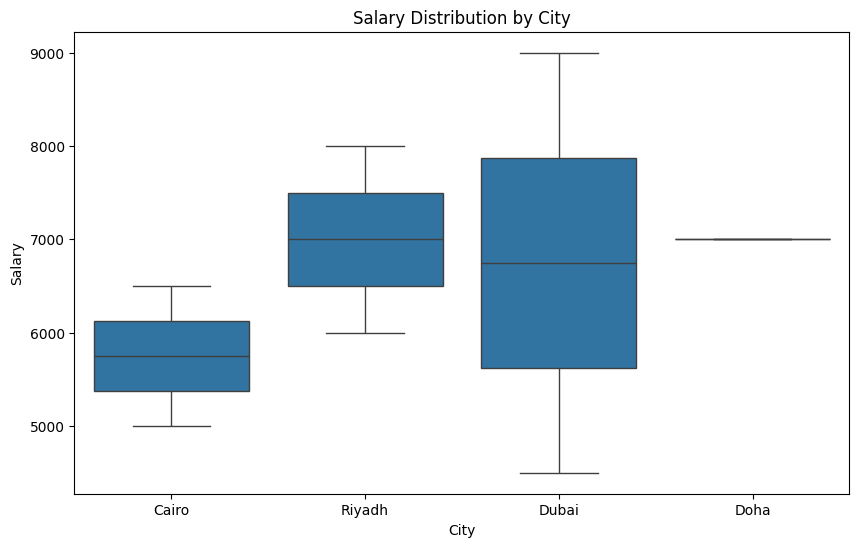

In [ ]:
# Step 4: Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of salaries by city
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Salary', data=employees_df)
plt.title('Salary Distribution by City')
plt.xlabel('City')
plt.ylabel('Salary')
plt.show()

2: Sales Data Analysis

In [ ]:
# Create a DataFrame for product sales
sales_data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Price': [100, 200, 150, 300, 250],
    'Quantity_Sold': [30, 50, 40, 20, 60],
    'Sale_Date': pd.to_datetime(['2024-01-01', '2024-01-05', '2024-01-10', '2024-01-15', '2024-01-20'])
}

sales_df = pd.DataFrame(sales_data)
print("Sales Data:\n", sales_df)

Sales Data:
      Product  Price  Quantity_Sold  Sale_Date
0  Product A    100             30 2024-01-01
1  Product B    200             50 2024-01-05
2  Product C    150             40 2024-01-10
3  Product D    300             20 2024-01-15
4  Product E    250             60 2024-01-20


In [ ]:
# Step 2: Analyze Sales Data

# Calculate total sales for each product
sales_df['Total_Sales'] = sales_df['Price'] * sales_df['Quantity_Sold']
print("Total Sales for Each Product:\n", sales_df[['Product', 'Total_Sales']])

# Calculate overall total sales
overall_total_sales = sales_df['Total_Sales'].sum()
print("Overall Total Sales:", overall_total_sales)

# Calculate average quantity sold per product
average_quantity_sold = sales_df['Quantity_Sold'].mean()
print("Average Quantity Sold per Product:", average_quantity_sold)

Total Sales for Each Product:
      Product  Total_Sales
0  Product A         3000
1  Product B        10000
2  Product C         6000
3  Product D         6000
4  Product E        15000
Overall Total Sales: 40000
Average Quantity Sold per Product: 40.0


In [ ]:
# Step 3: Analyze by Time Period

# Add a month column
sales_df['Month'] = sales_df['Sale_Date'].dt.month
monthly_sales = sales_df.groupby('Month')['Total_Sales'].sum()
print("Total Sales by Month:\n", monthly_sales)

Total Sales by Month:
 Month
1    40000
Name: Total_Sales, dtype: int64


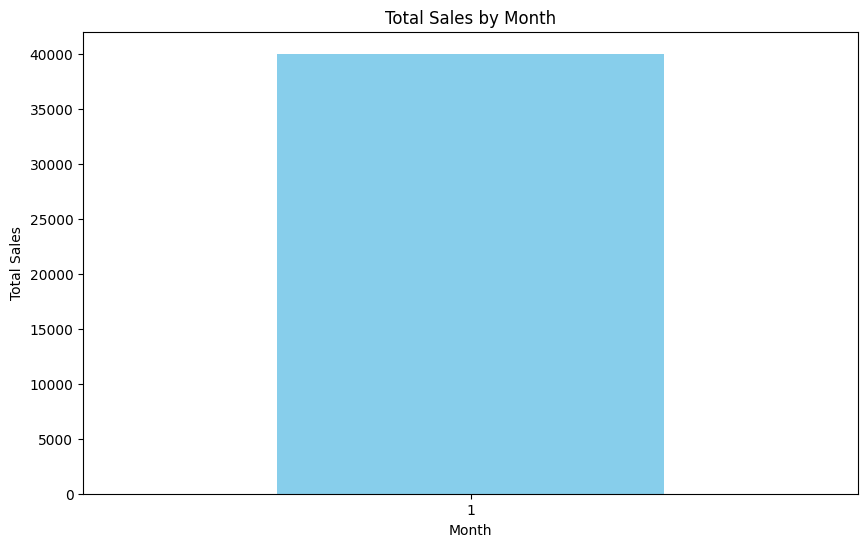

In [ ]:
# Step 4: Visualization

# Bar chart of total sales by month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

3: Student Performance Analysis

In [ ]:
# Step 1: Create a DataFrame for Students

# Create a DataFrame for student performance
students_data = {
    'Name': ['Ahmed', 'Fatima', 'Ali', 'Sara', 'Mohamed', 'Leila', 'Yusuf'],
    'Math_Scores': [85, 90, 78, 92, 88, 76, 95],
    'Science_Scores': [80, 85, 88, 90, 85, 82, 94],
    'Arabic_Scores': [90, 92, 85, 88, 91, 87, 95]
}

students_df = pd.DataFrame(students_data)
print("Student Data:\n", students_df)


Student Data:
       Name  Math_Scores  Science_Scores  Arabic_Scores
0    Ahmed           85              80             90
1   Fatima           90              85             92
2      Ali           78              88             85
3     Sara           92              90             88
4  Mohamed           88              85             91
5    Leila           76              82             87
6    Yusuf           95              94             95


In [ ]:
# Step 2: Calculate Averages

# Calculate overall average for each student
students_df['Average_Score'] = students_df[['Math_Scores', 'Science_Scores', 'Arabic_Scores']].mean(axis=1)
print("Student Data with Average Scores:\n", students_df)


Student Data with Average Scores:
       Name  Math_Scores  Science_Scores  Arabic_Scores  Average_Score
0    Ahmed           85              80             90      85.000000
1   Fatima           90              85             92      89.000000
2      Ali           78              88             85      83.666667
3     Sara           92              90             88      90.000000
4  Mohamed           88              85             91      88.000000
5    Leila           76              82             87      81.666667
6    Yusuf           95              94             95      94.666667


In [ ]:
# Step 3: Classify Students

# Classify students based on average score
students_df['Classification'] = pd.cut(students_df['Average_Score'], bins=[0, 80, 90, 100], labels=['Poor', 'Average', 'Excellent'])
print("Student Data with Classification:\n", students_df)


Student Data with Classification:
       Name  Math_Scores  Science_Scores  Arabic_Scores  Average_Score  \
0    Ahmed           85              80             90      85.000000   
1   Fatima           90              85             92      89.000000   
2      Ali           78              88             85      83.666667   
3     Sara           92              90             88      90.000000   
4  Mohamed           88              85             91      88.000000   
5    Leila           76              82             87      81.666667   
6    Yusuf           95              94             95      94.666667   

  Classification  
0        Average  
1        Average  
2        Average  
3        Average  
4        Average  
5        Average  
6      Excellent  


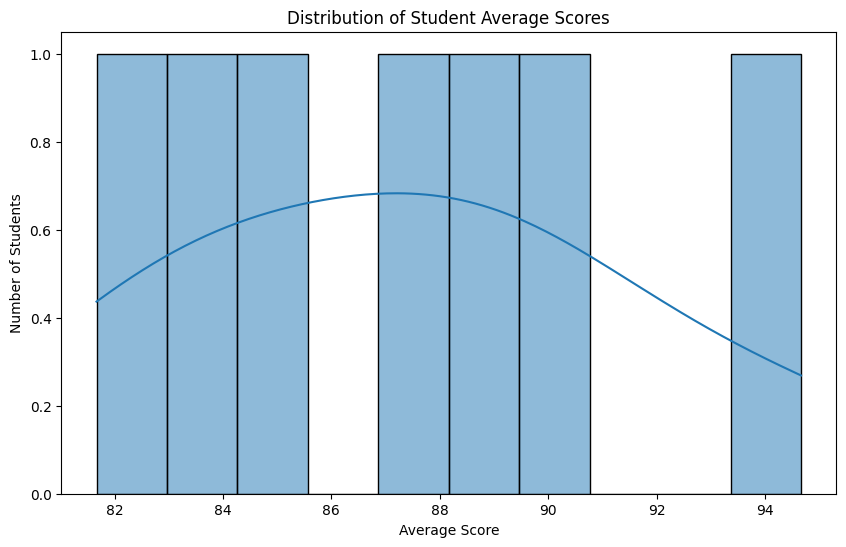

In [ ]:
# Step 4: Visualization

# Histogram of average scores
plt.figure(figsize=(10, 6))
sns.histplot(students_df['Average_Score'], bins=10, kde=True)
plt.title('Distribution of Student Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()


In [ ]:
import pandas as pd

# إنشاء قائمة من الأسماء
data = ['Иванов Иван', 'Петров Петр', 'Сидоров Сидор']

# إنشاء Series جديدة مع تحديد الفهارس
names = pd.Series(data, index=['Пекарь', 'Сварщик', 'Маляр'])



In [ ]:
names

,0
Пекарь,Иванов Иван
Сварщик,Петров Петр
Маляр,Сидоров Сидор


In [ ]:
# تعيين اسم لـ Series الأسماء
names.name = 'names'


In [ ]:
names

,names
Пекарь,Иванов Иван
Сварщик,Петров Петр
Маляр,Сидоров Сидор


In [ ]:
# إنشاء Series للبريد الإلكتروني
emails_data = ['ivanov@ya.ru', 'petrov@ya.ru', 'sidorov@ya.ru']
emails = pd.Series(emails_data, index=['Пекарь', 'Сварщик', 'Маляр'], name='emails')

# دمج Series الأسماء مع Series البريد الإلكتروني
df = pd.concat([names, emails], axis=1)

# طباعة DataFrame الناتج
print(df)


                     0         emails
Пекарь     Иванов Иван   ivanov@ya.ru
Сварщик    Петров Петр   petrov@ya.ru
Маляр    Сидоров Сидор  sidorov@ya.ru


In [ ]:
import numpy as np

array1 = np.array([1, 2, 3])
print(array1)

[1 2 3]


In [ ]:
zeros = np.zeros(5)
print(zeros)

[0. 0. 0. 0. 0.]


In [ ]:
ones = np.ones(5)
print(ones)

[1. 1. 1. 1. 1.]


In [ ]:
arra = np.arange(9)
print(arra)

[0 1 2 3 4 5 6 7 8]


In [ ]:
arra2 = np.arange(0, 9, 3)
print(arra2)

[0 3 6]


In [ ]:
aa = np.linspace(0, 55, 24)
print(aa)

[ 0.          2.39130435  4.7826087   7.17391304  9.56521739 11.95652174
 14.34782609 16.73913043 19.13043478 21.52173913 23.91304348 26.30434783
 28.69565217 31.08695652 33.47826087 35.86956522 38.26086957 40.65217391
 43.04347826 45.43478261 47.82608696 50.2173913  52.60869565 55.        ]


In [ ]:
# إنشاء مصفوفة حجمها 1000x1000
large_array_empty = np.empty((1000, 1000))  # مصفوفة كبيرة غير مهيأة

In [ ]:
# Giving a name to series names
names.name = 'name'

In [9]:
import pandas as pd

data = {
    'names': ['Иванов Иван', 'Петров Петр', 'Сидоров Сидор'],
    'emails': ['ivanov@ya.ru', 'petrov@ya.ru', 'sidorov@ya.ru'],
    'ages': [25, 30, 35]
}

df = pd.DataFrame(data)

df.index = ['Worker1', 'Worker2', 'Worder3']

df['salaries'] = [5000, 6000, 7000]

df.loc['Worker1', 'ages'] = 26

print(df)

df.to_csv('output.csv', index=False)

                 names         emails  ages  salaries
Worker1    Иванов Иван   ivanov@ya.ru    26      5000
Worker2    Петров Петр   petrov@ya.ru    30      6000
Worder3  Сидоров Сидор  sidorov@ya.ru    35      7000


In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

In [12]:
# Create an empty DataFrame

import pandas as pd

df = pd.DataFrame()

print(df)

Empty DataFrame
Columns: []
Index: []


In [9]:
import pandas as pd

# إنشاء قوائم تحتوي على بيانات
first_names = ['Ваня', 'Петя', 'Коля', 'Миша', 'Саша', 'Эдик', 'Маша', 'Вася']  # الأسماء الأولى
last_names = ['Николаев', 'Смирнов', 'Труфанов', 'Нечаев', 'Васильев', 'Романов', 'Сазонова', 'Полетаев']  # الألقاب
ages = [40, 17, 48, 16, 32, 18, 27, 32]  # الأعمار

# إنشاء قاموس يحتوي على القوائم
data = {'first': first_names, 'last': last_names, 'ages': ages}  # القاموس يمثل الأعمدة والبيانات

# تحويل القاموس إلى DataFrame
participants = pd.DataFrame(data)  # إنشاء DataFrame من القاموس

# طباعة DataFrame
print(participants)


  first      last  ages
0  Ваня  Николаев    40
1  Петя   Смирнов    17
2  Коля  Труфанов    48
3  Миша    Нечаев    16
4  Саша  Васильев    32
5  Эдик   Романов    18
6  Маша  Сазонова    27
7  Вася  Полетаев    32


In [10]:
participants.index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
print(participants)

   first      last  ages
P1  Ваня  Николаев    40
P2  Петя   Смирнов    17
P3  Коля  Труфанов    48
P4  Миша    Нечаев    16
P5  Саша  Васильев    32
P6  Эдик   Романов    18
P7  Маша  Сазонова    27
P8  Вася  Полетаев    32


In [15]:
participants['nationality'] = ['Arab'] * len(participants)
print(participants)

   first      last  ages nationality
P1  Ваня  Николаев    40        Arab
P2  Петя   Смирнов    17        Arab
P3  Коля  Труфанов    48        Arab
P4  Миша    Нечаев    16        Arab
P5  Саша  Васильев    32        Arab
P6  Эдик   Романов    18        Arab
P7  Маша  Сазонова    27        Arab
P8  Вася  Полетаев    32        Arab


In [24]:
import pandas as pd

data = [
    ["Ваня", "Николаев", 40],  # الصف الأول
    ["Петя", "Смирнов", 17],  # الصف الثاني
    ["Коля", "Труфанов", 48],  # الصف الثالث
    ["Миша", "Нечаев", 16],  # الصف الرابع
    ["Саша", "Васильев", 32],  # الصف الخامس
    ["Эдик", "Романов", 18],  # الصف السادس
    ["Маша", "Сазонова", 27],  # الصف السابع
    ["Вася", "Полетаев", 32]   # الصف الثامن
]

participants = pd.DataFrame(data)

print(participants)

      0         1   2
0  Ваня  Николаев  40
1  Петя   Смирнов  17
2  Коля  Труфанов  48
3  Миша    Нечаев  16
4  Саша  Васильев  32
5  Эдик   Романов  18
6  Маша  Сазонова  27
7  Вася  Полетаев  32


In [25]:
column_names = ['first', 'last', 'ages']
index_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

participants = pd.DataFrame(data, columns=column_names, index=index_labels)

print(participants)

  first      last  ages
A  Ваня  Николаев    40
B  Петя   Смирнов    17
C  Коля  Труфанов    48
D  Миша    Нечаев    16
E  Саша  Васильев    32
F  Эдик   Романов    18
G  Маша  Сазонова    27
H  Вася  Полетаев    32


In [ ]:
x = list()
print(dir(x))


['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [ ]:
# إنشاء مصفوفة 2D عشوائية (4 صفوف و3 أعمدة)
random_matrix = np.random.rand(4, 3)

print(random_matrix.ndim)
print(random_matrix)

2
[[0.45063146 0.67819722 0.25550102]
 [0.73081589 0.75371149 0.41579516]
 [0.19087475 0.87527581 0.16718508]
 [0.0940034  0.39075416 0.93429159]]


In [ ]:
import numpy as np

# إنشاء مصفوفة 2D (3 صفوف و4 أعمدة)
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

print(matrix.ndim)
print(matrix)


2
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Tasks

In [ ]:
import numpy as np

# Create an array with shape (3, 4)
data = np.arange(12).reshape(3, 4)
print("data:\n", data)
print("Minimum value:", data.min())       # Minimum value
print("Sum of all values:", data.sum())   # Sum of all values
print("Mean value:", data.mean())         # Mean value
print("Standard deviation:", data.std())   # Standard deviation
print("Maximum value:", data.max())       # Maximum value

print("Sum of each row:", data.sum(axis=1))   # Sum along axis 1 - result for each row
print("Sum of each column:", data.sum(axis=0)) # Sum along axis 0 - result for each column

print("Standard deviation of each row:", data.std(axis=1))   # Standard deviation of each row
print("Standard deviation of each column:", data.std(axis=0)) # Standard deviation of each column

print("Index of the maximum element of each row:", data.argmax(axis=1))   # Index of the maximum element in each row
print("Index of the maximum element of each column:", data.argmax(axis=0)) # Index of the maximum element in each column

print("Maximum element of each row:", data.max(axis=1))   # Maximum element in each row
print("Maximum element of each column:", data.max(axis=0)) # Maximum element in each column


data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Minimum value: 0
Sum of all values: 66
Mean value: 5.5
Standard deviation: 3.452052529534663
Maximum value: 11
Sum of each row: [ 6 22 38]
Sum of each column: [12 15 18 21]
Standard deviation of each row: [1.11803399 1.11803399 1.11803399]
Standard deviation of each column: [3.26598632 3.26598632 3.26598632 3.26598632]
Index of the maximum element of each row: [3 3 3]
Index of the maximum element of each column: [2 2 2 2]
Maximum element of each row: [ 3  7 11]
Maximum element of each column: [ 8  9 10 11]


In [ ]:
# Матричные операции

# Create another array A1
A1 = np.arange(9).reshape(3, 3)
print("A1:\n", A1)
print("Transposed A:\n", A1.T)  # Transpose

# Create an array A2
A2 = np.ones(9).reshape(3, 3)
print("A1 @ A2:\n", A1 @ A2)  # Matrix multiplication

print("Dot product:\n", A1.dot(A2))  # Dot product
print("Diagonal of the matrix:\n", A1.diagonal())  # Diagonal of the matrix

A1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Transposed A:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]
A1 @ A2:
 [[ 3.  3.  3.]
 [12. 12. 12.]
 [21. 21. 21.]]
Dot product:
 [[ 3.  3.  3.]
 [12. 12. 12.]
 [21. 21. 21.]]
Diagonal of the matrix:
 [0 4 8]


In [ ]:
print("Data type:", A1.dtype)
print("Number of elements:", A1.size)
print("Memory occupied:", A1.nbytes)

# Create an array with int8 type
C = np.arange(9, dtype=np.int8).reshape(3, 3)
print("Data type:", C.dtype)
print("Number of elements:", C.size)
print("Memory occupied:", C.nbytes)

Data type: int64
Number of elements: 9
Memory occupied: 72
Data type: int8
Number of elements: 9
Memory occupied: 9


In [ ]:
import numpy as np

# إنشاء مصفوفة A1
A1 = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# إنشاء مصفوفة A2
A2 = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]])

print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 {A2.shape} = A3 {(A1 + A2).shape}:\n", A1 + A2)

A1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
A2:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
A1 (3, 3) + A2 (3, 3) = A3 (3, 3):
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
A2 = np.array([1, 1, 1])
print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 {A2.shape} = A3 {(A1 + A2).shape}:\n", A1 + A2)

A1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
A2:
 [1 1 1]
A1 (3, 3) + A2 (3,) = A3 (3, 3):
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
A2 = 1
print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 (int) = A3 {(A1 + A2).shape}:\n", A1 + A2)

A1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
A2:
 1
A1 (3, 3) + A2 (int) = A3 (3, 3):
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
A1 = np.arange(10).reshape(2, 1, 5)
A2 = np.arange(14).reshape(2, 7, 1)
print("A1:\n", A1)
print("A2:\n", A2)
print(f"A1 {A1.shape} + A2 {A2.shape} = A3 {(A1 + A2).shape}:\n", A1 + A2)

# Result
# A1:
#  [[[0 1 2 3 4]]
#
#  [[5 6 7 8 9]]]
# A2:
#  [[[ 0]
#   [ 1]
#   [ 2]
#   [ 3]
#   [ 4]
#   [ 5]
#   [ 6]]
#
#  [[ 7]
#   [ 8]
#   [ 9]
#   [10]
#   [11]
#   [12]
#   [13]]]
# A1 (2, 1, 5) + A2 (2, 7, 1) = A3 (2, 7, 5):
#  [[[ 0  1  2  3  4]
#   [ 1  2  3  4  5]
#   [ 2  3  4  5  6]
#   [ 3  4  5  6  7]
#   [ 4  5  6  7  8]
#   [ 5  6  7  8  9]
#   [ 6  7  8  9 10]]
#
#  [[12 13 14 15 16]
#   [13 14 15 16 17]
#   [14 15 16 17 18]
#   [15 16 17 18 19]
#   [16 17 18 19 20]
#   [17 18 19 20 21]
#   [18 19 20 21 22]]]


A1:
 [[[0 1 2 3 4]]

 [[5 6 7 8 9]]]
A2:
 [[[ 0]
  [ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]
  [10]
  [11]
  [12]
  [13]]]
A1 (2, 1, 5) + A2 (2, 7, 1) = A3 (2, 7, 5):
 [[[ 0  1  2  3  4]
  [ 1  2  3  4  5]
  [ 2  3  4  5  6]
  [ 3  4  5  6  7]
  [ 4  5  6  7  8]
  [ 5  6  7  8  9]
  [ 6  7  8  9 10]]

 [[12 13 14 15 16]
  [13 14 15 16 17]
  [14 15 16 17 18]
  [15 16 17 18 19]
  [16 17 18 19 20]
  [17 18 19 20 21]
  [18 19 20 21 22]]]


In [ ]:
import numpy as np

array1 = np.array([4, 8, 9])
array2 = np.array([1, 2, 3])

print("Element-wise multiplication:", array1 * array2)
print("Element-wise addition:", array1 + array2)
print("Element-wise subtraction:", array1 - array2)

Element-wise multiplication: [ 4 16 27]
Element-wise addition: [ 5 10 12]
Element-wise subtraction: [3 6 6]
Element-wise division: [4. 4. 3.]


In [ ]:
import numpy as np

In [ ]:
array4 = np.empty(3)
print(array4)

[1. 1. 1.]


In [ ]:
array5 = np.arange(5)
print(array5)

[0 1 2 3 4]


In [ ]:
array5 = np.arange(3)
print(array5)

[0 1 2]


In [ ]:
array_zeros = np.zeros((3, 3))
print(array_zeros)

array_ones = np.ones((2, 2))
print("\n", array_ones)

array_empty = np.empty((4, 4))
print("\n", array_empty)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

 [[1. 1.]
 [1. 1.]]

 [[2.95592934e-316 0.00000000e+000 2.41907520e-312 2.37663529e-312]
 [2.22809558e-312 2.46151512e-312 6.79038654e-313 2.35541533e-312]
 [2.46151512e-312 6.79038654e-313 2.35541533e-312 6.79038654e-313]
 [2.14321575e-312 2.22809558e-312 2.14321575e-312 0.00000000e+000]]


In [ ]:
large_array_empty = np.empty((1000, 1000))
large_array_empty

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np

oned = np.arange(21)

print("نوع البيانات:", oned.dtype)
print("عدد العناصر:", oned.size)
print("حجم الذاكرة:", oned.nbytes)
print("شكل المصفوفة:", oned.shape)
print("عدد الأبعاد:", oned.ndim)

نوع البيانات: int64
عدد العناصر: 21
حجم الذاكرة: 168
شكل المصفوفة: (21,)
عدد الأبعاد: 1


In [ ]:
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

print(matrix, "\n")
print("شكل:", matrix.shape)
print("عدد الأبعاد:", matrix.ndim)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]] 

شكل: (4, 4)
عدد الأبعاد: 2


In [ ]:
reshaped_1d = matrix.reshape(16)
print(reshaped_1d, "\n")

reshaped_2d = matrix.reshape(2, 8)
print(reshaped_2d, "\n")

new_array = matrix.reshape(2, 2, 2, 2)
print(new_array, "\n")
print("شكل:", new_array.shape, "\n")
print("عدد الأبعاد:", new_array.ndim, "\n")


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 

[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]] 

[[[[ 1  2]
   [ 3  4]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 9 10]
   [11 12]]

  [[13 14]
   [15 16]]]] 

شكل: (2, 2, 2, 2) 

عدد الأبعاد: 4 



In [ ]:
import numpy as np

one = np.arange(10)
print("عنصر المصفوفة 1D بالفهرس 3 (بدءًا من 0):", one[3])
print("آخر عنصر في المصفوفة 1D (أو الأول من النهاية):", one[-1])
print("تقطيع عناصر المصفوفة 1D (من 3 إلى 8 غير شامل):", one[3:8])


عنصر المصفوفة 1D بالفهرس 3 (بدءًا من 0): 3
آخر عنصر في المصفوفة 1D (أو الأول من النهاية): 9
تقطيع عناصر المصفوفة 1D (من 3 إلى 8 غير شامل): [3 4 5 6 7]


In [ ]:
two = np.arange(21).reshape(3, 7)  # إنشاء مصفوفة 3 × 7
print("الحصول على الصف الثاني:", two[2])  # العد يبدأ من الصفر
print("الحصول على العنصر في الصف 2 والعمود 4:", two[2, 4])  # العد يبدأ من الصفر
print("الحصول على الصفين 0 و 1:", two[0:2])  # نطاقات في بايثون تشمل القيمة الابتدائية ولا تشمل النهاية
print("الحصول على العمود 5 من جميع الصفوف:", two[:, 5])
print("الحصول على آخر ثلاثة أعمدة من الصفين 1 و 2:", two[1:3, -3:])

الحصول على الصف الثاني: [14 15 16 17 18 19 20]
الحصول على العنصر في الصف 2 والعمود 4: 18
الحصول على الصفين 0 و 1: [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]]
الحصول على العمود 5 من جميع الصفوف: [ 5 12 19]
الحصول على آخر ثلاثة أعمدة من الصفين 1 و 2: [[11 12 13]
 [18 19 20]]


In [ ]:
two[0, 0] = 33
print(two)

two[1:, :3] = 0
print(two)

[[33  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]
[[33  1  2  3  4  5  6]
 [ 0  0  0 10 11 12 13]
 [ 0  0  0 17 18 19 20]]


In [ ]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]
result = [a + b for a, b in zip(list1, list2)]
print(result)  # [5, 7, 9]

[5, 7, 9]


In [ ]:
import numpy as np

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
result = array1 + array2
print(result)  # [5 7 9]

[5 7 9]


In [ ]:
# الطرح
result_sub = array1 - array2  # [-3 -3 -3]
print(result_sub)

# الضرب
result_mul = array1 * array2  # [ 4 10 18]
print(result_mul
      )
# القسمة
result_div = array1 / array2  # [0.25 0.4 0.5]
print(result_div)

[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


In [ ]:
bool_array1 = np.array([True, False, True])
bool_array2 = np.array([False, False, True])
result_logical = bool_array1 & bool_array2  # [False False  True]
result_logical

array([False, False,  True])

In [ ]:
import numpy as np

# Create an array A with shape (4, 6)
a = np.arange(24).reshape(4, 6)
print("Array A:\n", a)

# Create a view B from A
b = a[:2, 3:]
print("Array B:\n", b)

# Modify an element in B
b[1, 2] = -1
print("Array B after modification:\n", b)
print("Array A after modification:\n", a)

Array A:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Array B:
 [[ 3  4  5]
 [ 9 10 11]]
Array B after modification:
 [[ 3  4  5]
 [ 9 10 -1]]
Array A after modification:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 -1]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
# Create a copy of B
b = a[:2, 3:].copy()  # Make a copy
print("Array B (copy):\n", b)

# Modify an element in the copy
b[1, 2] = -1
print("Array B after modification (copy):\n", b)
print("Array A after modification (copy):\n", a)

Array B (copy):
 [[ 3  4  5]
 [ 9 10 -1]]
Array B after modification (copy):
 [[ 3  4  5]
 [ 9 10 -1]]
Array A after modification (copy):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 -1]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
